# Diwali Sales Analysis

In [38]:
# Import liberaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
try:
    df=pd.read_csv('Diwali Sales Data.csv',encoding='latin-1')
except UnicodeDecodeError:
    print("UnicodeDecodeError: Couldn't decode the CSV file using UTF-8 encoding.")

In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Data Cleaning

In [18]:
df.drop(['Status','unnamed1'],axis =1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [60]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### State Wise total sales

In [33]:
state_wise=df.groupby(['State'],as_index=False)['Amount'].sum()
state_wise.head()

,State,Amount
0,Andhra Pradesh,8037146.99
1,Bihar,4022757.00
2,Delhi,11603819.45
3,Gujarat,3946082.00
4,Haryana,4220175.00


In [35]:
state_wise.sort_values(by=['Amount'],inplace=True,ascending=False)

### Augmented data (converting price to millions)

In [47]:
state_wise['Million'] =state_wise['Amount'] / 1000000

In [58]:
def plot_labels(matplotclass,xlabel,ylabel,title,xticks:int):
    matplotclass.xlabel(xlabel)
    matplotclass.ylabel(ylabel)
    matplotclass.title(title)   
    matplotclass.xticks(rotation=xticks)
    matplotclass.show()

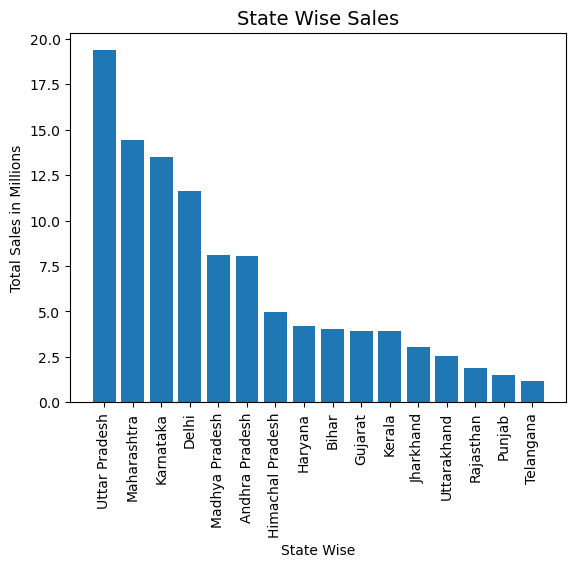

In [52]:
plt.bar(state_wise['State'],state_wise['Million'])
plt.xticks(rotation =90)
plt.xlabel("State Wise")
plt.title("State Wise Sales",fontdict={'size':14,'style': 'normal'})

plt.ylabel("Total Sales in Millions")

plt.show()

### State wise using seaborn

In [87]:
state_wise.columns

Index(['State', 'Amount', 'Million'], dtype='object')

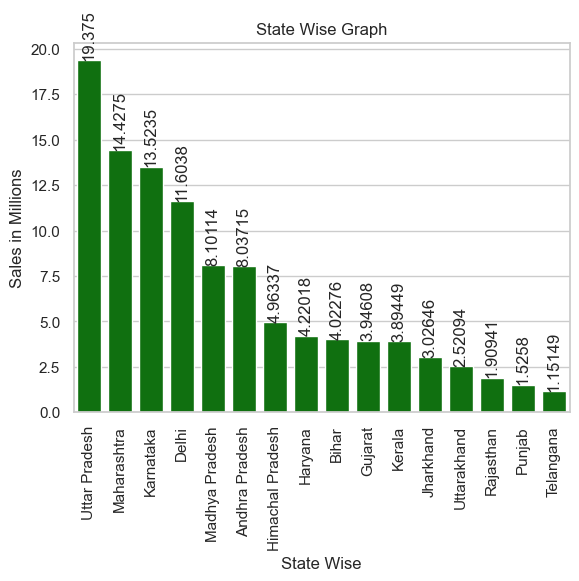

In [95]:
sns.set(style="whitegrid")
ax=sns.barplot(x='State',y='Million',data = state_wise,color='green')

for bar_value in ax.containers:
    ax.bar_label(bar_value,rotation = 90) 
plot_labels(plt,xlabel="State Wise",ylabel='Sales in Millions',title="State Wise Graph",xticks=90)


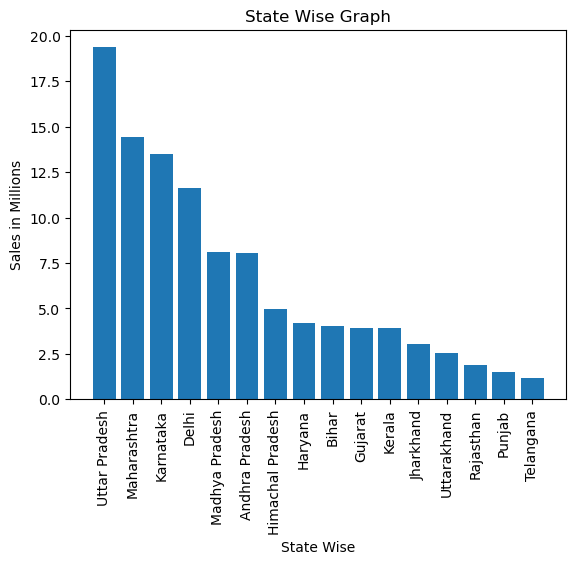

In [59]:
plt.bar(state_wise['State'],state_wise['Million'])
plot_labels(plt,xlabel="State Wise",ylabel='Sales in Millions',title="State Wise Graph",xticks=90)

### Gender

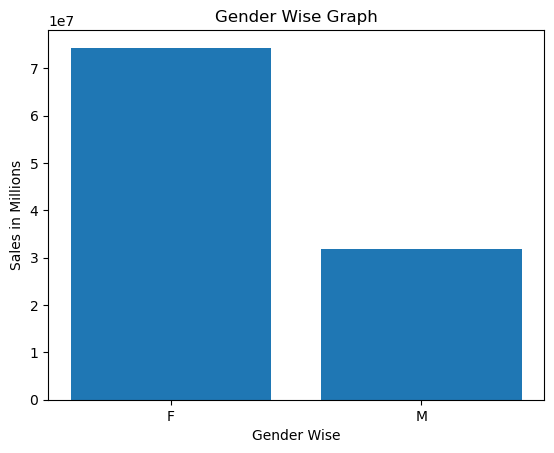

In [66]:
x_axis =df.groupby(['Gender'])['Amount'].sum().index
y_axis =df.groupby(['Gender'])['Amount'].sum()

plt.yticks()

plt.bar(x_axis,y_axis)
plot_labels(plt,xlabel="Gender Wise",ylabel='Sales in Millions',title="Gender Wise Graph",xticks=0)

#### Using Seaborn liberaries

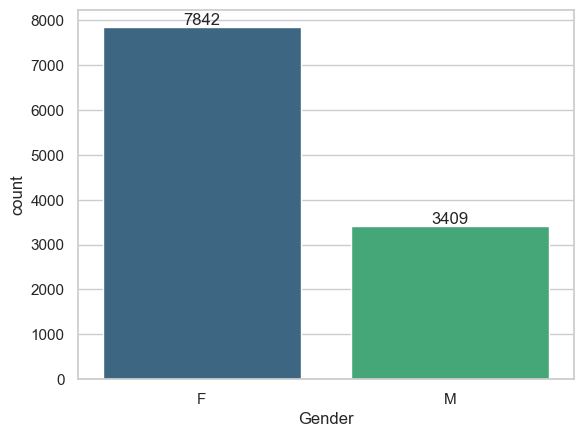

In [130]:
ax = sns.countplot(x ='Gender',data=df,palette='viridis')
for i in ax.containers:
    ax.bar_label(i)

## Age Group Wise


In [96]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [116]:
# unique_categories = df['Gender'].unique()
# custom_palette = sns.color_palette('husl', n_colors=len(unique_categories))

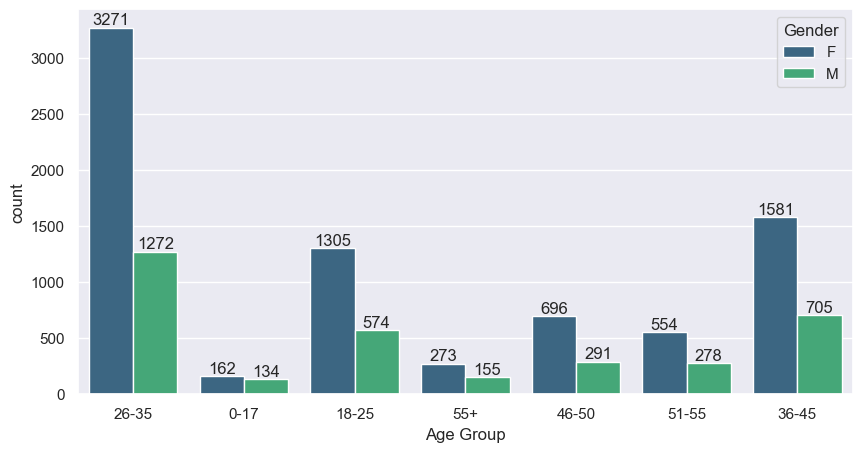

In [131]:


# custom_palette = {'M': 'blue', 'F': 'green'}
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(data=df,x='Age Group',hue='Gender',palette='viridis')
for i in ax.containers:
    ax.bar_label(i)

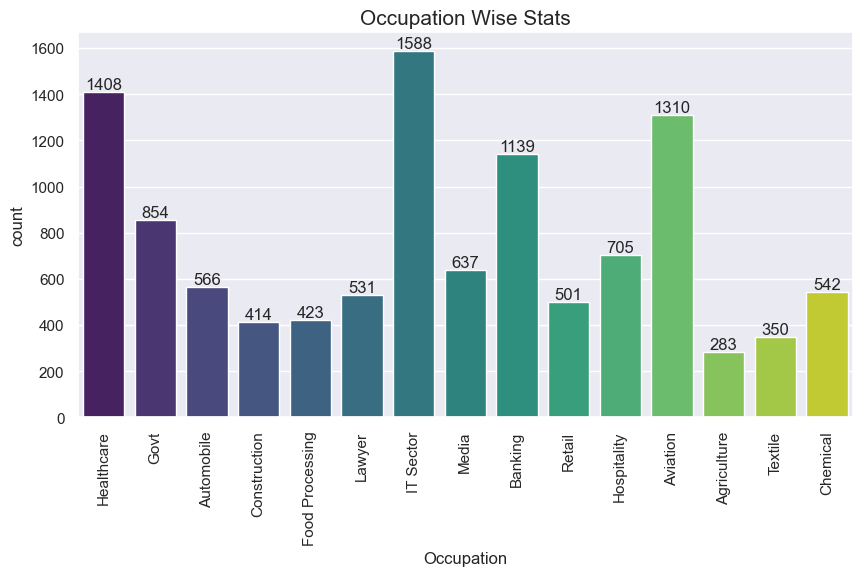

In [138]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(data=df,x='Occupation',palette='viridis')
plt.title('Occupation Wise Stats',fontdict={'size': 15})
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)

### Product Category

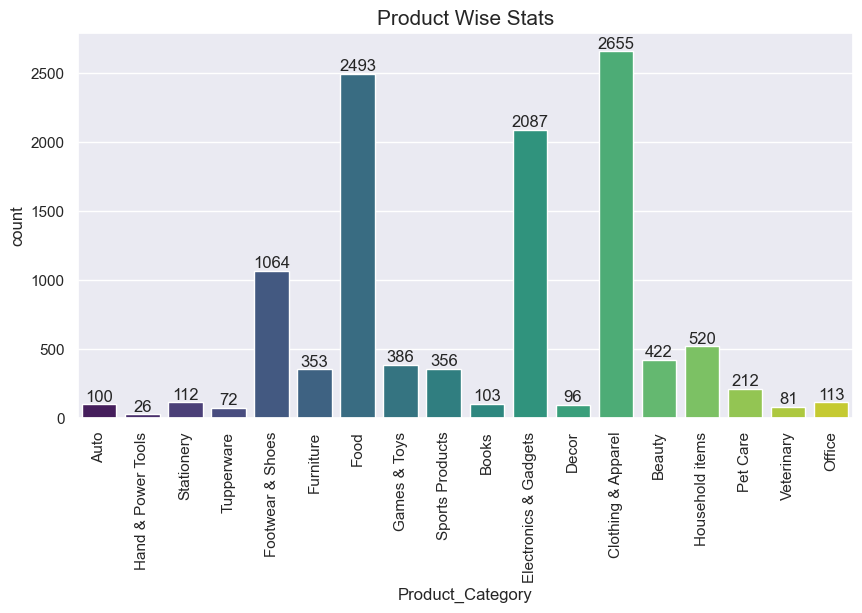

In [139]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(data=df,x='Product_Category',palette='viridis')
plt.title('Product Wise Stats',fontdict={'size': 15})
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i)